# Premier League Match Predictor

A test of various machine learning models at predicting the winners of premier league games

In [1]:
import pandas as pd

## Data Preprocessing

In [2]:
matches = pd.read_csv("matches.csv", index_col=0)

In [3]:
matches.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Blocks,Int,Tkl+Int,Clr,SoTA,Saves,OppCrosses,CrossesStp,Season,Team
0,2023-08-13,16:30,Premier League,Matchweek 1,Sun,Away,D,1.0,1.0,Chelsea,...,19.0,10.0,29,39.0,4.0,3.0,18.0,1.0,2023,Liverpool
1,2023-08-19,15:00,Premier League,Matchweek 2,Sat,Home,W,3.0,1.0,Bournemouth,...,13.0,11.0,26,15.0,5.0,4.0,6.0,1.0,2023,Liverpool
2,2023-08-27,16:30,Premier League,Matchweek 3,Sun,Away,W,2.0,1.0,Newcastle Utd,...,12.0,8.0,20,19.0,8.0,7.0,11.0,0.0,2023,Liverpool
3,2023-09-03,14:00,Premier League,Matchweek 4,Sun,Home,W,3.0,0.0,Aston Villa,...,5.0,8.0,22,11.0,3.0,3.0,9.0,1.0,2023,Liverpool
4,2023-09-16,12:30,Premier League,Matchweek 5,Sat,Away,W,3.0,1.0,Wolves,...,9.0,9.0,33,20.0,2.0,1.0,11.0,0.0,2023,Liverpool


In [4]:
matches.shape

(2056, 35)

In [5]:
matches["Team"].value_counts()

Team
Liverpool                   103
Manchester City             103
Arsenal                     103
Aston Villa                 103
Everton                     103
Manchester United           103
West Ham United             103
Newcastle United            103
Brighton and Hove Albion    103
Wolverhampton Wanderers     103
Brentford                   103
Crystal Palace              103
Chelsea                     102
Tottenham Hotspur           102
Leicester City               76
Southampton                  76
Leeds United                 76
Fulham                       65
Nottingham Forest            65
Burnley                      65
Bournemouth                  64
Watford                      38
Norwich City                 38
Sheffield United             27
Luton Town                   26
Name: count, dtype: int64

In [6]:
matches["Round"].value_counts()

Round
Matchweek 1     60
Matchweek 14    60
Matchweek 27    60
Matchweek 25    60
Matchweek 24    60
Matchweek 23    60
Matchweek 22    60
Matchweek 21    60
Matchweek 2     60
Matchweek 19    60
Matchweek 18    60
Matchweek 16    60
Matchweek 15    60
Matchweek 20    60
Matchweek 13    60
Matchweek 7     60
Matchweek 12    60
Matchweek 4     60
Matchweek 5     60
Matchweek 6     60
Matchweek 3     60
Matchweek 8     60
Matchweek 10    60
Matchweek 11    60
Matchweek 9     60
Matchweek 26    58
Matchweek 17    58
Matchweek 28    40
Matchweek 32    40
Matchweek 37    40
Matchweek 36    40
Matchweek 35    40
Matchweek 31    40
Matchweek 34    40
Matchweek 33    40
Matchweek 30    40
Matchweek 29    40
Matchweek 38    40
Name: count, dtype: int64

In [7]:
matches.dtypes

Date             object
Time             object
Comp             object
Round            object
Day              object
Venue            object
Result           object
GF              float64
GA              float64
Opponent         object
xG              float64
xGA             float64
Poss            float64
Attendance      float64
Captain          object
Formation        object
Referee          object
Match Report     object
Notes           float64
Sh              float64
SoT             float64
Dist            float64
FK              float64
PK                int64
PKatt             int64
Blocks          float64
Int             float64
Tkl+Int           int64
Clr             float64
SoTA            float64
Saves           float64
OppCrosses      float64
CrossesStp      float64
Season            int64
Team             object
dtype: object

In [8]:
matches["Date"] = pd.to_datetime(matches["Date"])

In [9]:
matches["Venue_Code"] = matches["Venue"].astype("category").cat.codes

In [10]:
matches.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Int,Tkl+Int,Clr,SoTA,Saves,OppCrosses,CrossesStp,Season,Team,Venue_Code
0,2023-08-13,16:30,Premier League,Matchweek 1,Sun,Away,D,1.0,1.0,Chelsea,...,10.0,29,39.0,4.0,3.0,18.0,1.0,2023,Liverpool,0
1,2023-08-19,15:00,Premier League,Matchweek 2,Sat,Home,W,3.0,1.0,Bournemouth,...,11.0,26,15.0,5.0,4.0,6.0,1.0,2023,Liverpool,1
2,2023-08-27,16:30,Premier League,Matchweek 3,Sun,Away,W,2.0,1.0,Newcastle Utd,...,8.0,20,19.0,8.0,7.0,11.0,0.0,2023,Liverpool,0
3,2023-09-03,14:00,Premier League,Matchweek 4,Sun,Home,W,3.0,0.0,Aston Villa,...,8.0,22,11.0,3.0,3.0,9.0,1.0,2023,Liverpool,1
4,2023-09-16,12:30,Premier League,Matchweek 5,Sat,Away,W,3.0,1.0,Wolves,...,9.0,33,20.0,2.0,1.0,11.0,0.0,2023,Liverpool,0


In [11]:
matches["Opp_Code"] = matches["Opponent"].astype("category").cat.codes

In [12]:
matches["Hour"] = matches["Time"].str.replace(":.+", "", regex=True).astype("int")

In [13]:
matches["Day_Code"] = matches["Date"].dt.dayofweek

In [14]:
matches.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,SoTA,Saves,OppCrosses,CrossesStp,Season,Team,Venue_Code,Opp_Code,Hour,Day_Code
0,2023-08-13,16:30,Premier League,Matchweek 1,Sun,Away,D,1.0,1.0,Chelsea,...,4.0,3.0,18.0,1.0,2023,Liverpool,0,6,16,6
1,2023-08-19,15:00,Premier League,Matchweek 2,Sat,Home,W,3.0,1.0,Bournemouth,...,5.0,4.0,6.0,1.0,2023,Liverpool,1,2,15,5
2,2023-08-27,16:30,Premier League,Matchweek 3,Sun,Away,W,2.0,1.0,Newcastle Utd,...,8.0,7.0,11.0,0.0,2023,Liverpool,0,16,16,6
3,2023-09-03,14:00,Premier League,Matchweek 4,Sun,Home,W,3.0,0.0,Aston Villa,...,3.0,3.0,9.0,1.0,2023,Liverpool,1,1,14,6
4,2023-09-16,12:30,Premier League,Matchweek 5,Sat,Away,W,3.0,1.0,Wolves,...,2.0,1.0,11.0,0.0,2023,Liverpool,0,24,12,5


In [15]:
matches["target"] = (matches["Result"]=="W").astype("int")

In [16]:
#If you wish to include draws as outcomes, use this line instead of above
#matches["target"] = matches["Result"].map({'W':2 , 'D':1, 'L':0})

In [17]:
matches["target"]

0     0
1     1
2     1
3     1
4     1
     ..
38    0
39    0
40    0
41    0
42    0
Name: target, Length: 2056, dtype: int32

In [18]:
matches.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Saves,OppCrosses,CrossesStp,Season,Team,Venue_Code,Opp_Code,Hour,Day_Code,target
0,2023-08-13,16:30,Premier League,Matchweek 1,Sun,Away,D,1.0,1.0,Chelsea,...,3.0,18.0,1.0,2023,Liverpool,0,6,16,6,0
1,2023-08-19,15:00,Premier League,Matchweek 2,Sat,Home,W,3.0,1.0,Bournemouth,...,4.0,6.0,1.0,2023,Liverpool,1,2,15,5,1
2,2023-08-27,16:30,Premier League,Matchweek 3,Sun,Away,W,2.0,1.0,Newcastle Utd,...,7.0,11.0,0.0,2023,Liverpool,0,16,16,6,1
3,2023-09-03,14:00,Premier League,Matchweek 4,Sun,Home,W,3.0,0.0,Aston Villa,...,3.0,9.0,1.0,2023,Liverpool,1,1,14,6,1
4,2023-09-16,12:30,Premier League,Matchweek 5,Sat,Away,W,3.0,1.0,Wolves,...,1.0,11.0,0.0,2023,Liverpool,0,24,12,5,1


## Training the Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf = RandomForestClassifier(n_estimators=80, min_samples_split=12, random_state=1)

In [21]:
train = matches[matches["Date"] < '2023-09-01']

In [22]:
test = matches[matches["Date"] > '2023-09-01']

In [23]:
predictors = ["Venue_Code", "Opp_Code", "Hour", "Day_Code"]

In [24]:
rf.fit(train[predictors],train["target"])

RandomForestClassifier(min_samples_split=12, n_estimators=80, random_state=1)

In [25]:
preds = rf.predict(test[predictors])

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
acc = accuracy_score(test["target"], preds)

In [28]:
acc

0.6029411764705882

In [29]:
combined = pd.DataFrame(dict(actual=test["target"], prediction = preds))

In [30]:
pd.crosstab(index=combined["actual"], columns=combined["prediction"])

prediction,0,1
actual,,
0,223,63
1,126,64


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
rf_preds = rf.predict(test[predictors])
cm = confusion_matrix(test["target"], rf_preds)
print(cm)
print('Accuracy:', accuracy_score(test["target"], rf_preds))
print('Precision:', precision_recall_fscore_support(test["target"], rf_preds, average=None)[0][0])
print('Recall:', precision_recall_fscore_support(test["target"], rf_preds, average=None)[1][0])
print('F1 Score:', precision_recall_fscore_support(test["target"], rf_preds, average=None)[2][0])

[[223  63]
 [126  64]]
Accuracy: 0.6029411764705882
Precision: 0.6389684813753582
Recall: 0.7797202797202797
F1 Score: 0.7023622047244095


## Improving Predictions with Rolling Averages of Match stats

In [33]:
grouped_matches = matches.groupby("Team")

In [34]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("Date")
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

In [35]:
cols = ["GF", "GA", "xG", "xGA", "Poss", "Sh", "SoT", "Dist", "FK", "PK", "PKatt", "Blocks", "Int", "Tkl+Int", "Clr", "SoTA", "Saves", "OppCrosses", "CrossesStp"]
new_cols = [f"{c}_rolling" for c in cols]

In [36]:
matches_rolling = matches.groupby("Team").apply(lambda x: rolling_averages(x, cols, new_cols), include_groups=True)

C:\Users\lukeg\AppData\Local\Temp\ipykernel_8520\3370473215.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matches_rolling = matches.groupby("Team").apply(lambda x: rolling_averages(x, cols, new_cols), include_groups=True)


In [37]:
matches_rolling.head()

Date   Time            Comp        Round  Day Venue Result  \
Team                                                                         
Arsenal 4 2021-09-11  15:00  Premier League  Matchweek 4  Sat  Home      W   
        5 2021-09-18  15:00  Premier League  Matchweek 5  Sat  Away      W   
        7 2021-09-26  16:30  Premier League  Matchweek 6  Sun  Home      W   
        8 2021-10-02  17:30  Premier League  Matchweek 7  Sat  Away      D   
        9 2021-10-18  20:00  Premier League  Matchweek 8  Mon  Home      D   

            GF   GA        Opponent  ...  PK_rolling  PKatt_rolling  \
Team                                 ...                              
Arsenal 4  1.0  0.0    Norwich City  ...         0.0            0.0   
        5  1.0  0.0         Burnley  ...         0.0            0.0   
        7  3.0  1.0       Tottenham  ...         0.0            0.0   
        8  0.0  0.0        Brighton  ...         0.0            0.0   
        9  2.0  2.0  Crystal Palace  ...         0.0            0.0   

           Blocks_rolling  Int_rolling Tkl+Int_rolling Clr_rolling  \
Team                                                                 
Arsenal 4       14.666667     8.333333       21.000000   19.000000   
        5       16.333333     7.000000       22.000000   20.000000   
        7       13.333333     8.666667       23.000000   29.000000   
        8       12.666667     8.000000       26.666667   25.666667   
        9       12.666667    10.666667       26.666667   26.333333   

          SoTA_rolling Saves_rolling  OppCrosses_rolling  CrossesStp_rolling  
Team                                                                          
Arsenal 4     6.000000      3.000000                16.0            1.666667  
        5     5.333333      3.000000                18.0            1.333333  
        7     4.666667      3.000000                24.0            2.000000  
        8     2.666667      2.333333                21.0            1.666667  
        9     3.000000      2.666667                23.0            2.000000  

[5 rows x 59 columns]

In [38]:
matches_rolling = matches_rolling.droplevel('Team')

In [39]:
matches_rolling.index = range(matches_rolling.shape[0])

In [61]:
def make_predictions(data, predictors):
    train = data[data["Date"] < '2023-10-01']
    test = data[data["Date"] > '2023-10-01']
    rf.fit(train[predictors],train["target"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["target"], prediction = preds))
    accuracy_score(test["target"], preds)
    return combined, acc

In [62]:
new_combined, new_acc = make_predictions(matches_rolling, (predictors+new_cols))

In [63]:
new_acc

0.6029411764705882

In [64]:
pd.crosstab(index=new_combined["actual"], columns=new_combined["prediction"])

prediction,0,1
actual,,
0,207,33
1,111,49


In [65]:
207/318

0.6509433962264151

In [66]:
49/82

0.5975609756097561

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
test = matches_rolling[matches_rolling["Date"] > '2023-10-01']
rf_preds = rf.predict(test[predictors+new_cols])
cm = confusion_matrix(test["target"], rf_preds)
print(cm)
print('Accuracy:', accuracy_score(test["target"], rf_preds))
print('Precision:', precision_recall_fscore_support(test["target"], rf_preds, average=None)[0][0])
print('Recall:', precision_recall_fscore_support(test["target"], rf_preds, average=None)[1][0])
print('F1 Score:', precision_recall_fscore_support(test["target"], rf_preds, average=None)[2][0])

[[207  33]
 [111  49]]
Accuracy: 0.64
Precision: 0.6509433962264151
Recall: 0.8625
F1 Score: 0.7419354838709677


In [69]:
new_combined = new_combined.merge(matches_rolling[["Date", "Team", "Opponent", "Result"]], left_index=True, right_index=True)

In [70]:
new_combined

,actual,prediction,Date,Team,Opponent,Result
80,1,1,2023-10-08,Arsenal,Manchester City,W
81,0,1,2023-10-21,Arsenal,Chelsea,D
82,1,1,2023-10-28,Arsenal,Sheffield Utd,W
83,0,1,2023-11-04,Arsenal,Newcastle Utd,L
84,1,1,2023-11-11,Arsenal,Burnley,W
...,...,...,...,...,...,...
1976,1,0,2024-02-04,Wolverhampton Wanderers,Chelsea,W
1977,0,0,2024-02-10,Wolverhampton Wanderers,Brentford,L
1978,1,0,2024-02-17,Wolverhampton Wanderers,Tottenham,W
1979,1,0,2024-02-25,Wolverhampton Wanderers,Sheffield Utd,W


In [71]:
merged = new_combined.merge(new_combined, left_on=["Date", "Team"], right_on=["Date", "Opponent"])

In [72]:
merged

,actual_x,prediction_x,Date,Team_x,Opponent_x,Result_x,actual_y,prediction_y,Team_y,Opponent_y,Result_y
0,1,1,2023-10-08,Arsenal,Manchester City,W,0,1,Manchester City,Arsenal,L
1,0,1,2023-10-21,Arsenal,Chelsea,D,0,0,Chelsea,Arsenal,D
2,1,1,2023-10-28,Arsenal,Sheffield Utd,W,0,0,Sheffield United,Arsenal,L
3,0,1,2023-11-04,Arsenal,Newcastle Utd,L,1,1,Newcastle United,Arsenal,W
4,1,1,2023-11-11,Arsenal,Burnley,W,0,0,Burnley,Arsenal,L
...,...,...,...,...,...,...,...,...,...,...,...
236,1,1,2024-02-10,Manchester City,Everton,W,0,0,Everton,Manchester City,L
237,0,1,2024-02-17,Manchester City,Chelsea,D,0,0,Chelsea,Manchester City,D
238,1,1,2024-02-20,Manchester City,Brentford,W,0,0,Brentford,Manchester City,L
239,1,1,2024-02-24,Manchester City,Bournemouth,W,0,0,Bournemouth,Manchester City,L


In [73]:
merged[(merged["prediction_x"] == 1) & (merged["prediction_y"] == 0)]["actual_x"].value_counts()

actual_x
1    40
0    13
Name: count, dtype: int64

In [74]:
40/53

0.7547169811320755

## XG_Boost

In [75]:
from xgboost import XGBClassifier
xg_classifier = XGBClassifier()
train = matches_rolling[matches_rolling["Date"] < '2023-10-01']
test = matches_rolling[matches_rolling["Date"] > '2023-10-01']
xg_classifier.fit(train[predictors+new_cols],train["target"])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [76]:
new_preds = xg_classifier.predict(test[predictors+new_cols])

In [77]:
acc = accuracy_score(test["target"], new_preds)

In [78]:
acc

0.6225

In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
cm = confusion_matrix(test["target"], new_preds)
print(cm)
print('Accuracy:', accuracy_score(test["target"], new_preds))
print('Precision:', precision_recall_fscore_support(test["target"], new_preds, average=None)[0][0])
print('Recall:', precision_recall_fscore_support(test["target"], new_preds, average=None)[1][0])
print('F1 Score:', precision_recall_fscore_support(test["target"], new_preds, average=None)[2][0])

[[187  53]
 [ 98  62]]
Accuracy: 0.6225
Precision: 0.656140350877193
Recall: 0.7791666666666667
F1 Score: 0.7123809523809523


## Kernel Support Vector Machine model

In [80]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(train[predictors+new_cols],train["target"])

SVC(random_state=0)

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
pred = classifier.predict(test[predictors+new_cols])
cm = confusion_matrix(test["target"], pred)
print(cm)
print('Accuracy:', accuracy_score(test["target"], pred))
print('Precision:', precision_recall_fscore_support(test["target"], pred, average=None)[0][0])
print('Recall:', precision_recall_fscore_support(test["target"], pred, average=None)[1][0])
print('F1 Score:', precision_recall_fscore_support(test["target"], pred, average=None)[2][0])

[[220  20]
 [134  26]]
Accuracy: 0.615
Precision: 0.6214689265536724
Recall: 0.9166666666666666
F1 Score: 0.7407407407407407


## Applying K-fold Cross Validation

In [82]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = train[predictors+new_cols], y = train["target"], cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 64.41 %
Standard Deviation: 5.54 %


## Applying Grid Search

In [83]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(train[predictors+new_cols], train["target"])
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 65.80 %
Best Parameters: {'C': 0.25, 'kernel': 'linear'}


## Naieve Bayes

In [84]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(train[predictors+new_cols], train["target"])

GaussianNB()

In [85]:

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
nb_pred = nb_classifier.predict(test[predictors+new_cols])
cm = confusion_matrix(test["target"], nb_pred)
print(cm)
print('Accuracy:', accuracy_score(test["target"], nb_pred))
print('Precision:', precision_recall_fscore_support(test["target"], nb_pred, average=None)[0][0])
print('Recall:', precision_recall_fscore_support(test["target"], nb_pred, average=None)[1][0])
print('F1 Score:', precision_recall_fscore_support(test["target"], nb_pred, average=None)[2][0])

[[174  66]
 [ 87  73]]
Accuracy: 0.6175
Precision: 0.6666666666666666
Recall: 0.725
F1 Score: 0.6946107784431138


## K-Nearest Neighbours

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(train[predictors+new_cols], train["target"])

KNeighborsClassifier()

In [147]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
knn_pred = knn_classifier.predict(test[predictors+new_cols])
cm = confusion_matrix(test["target"], knn_pred)
print(cm)
print('Accuracy:', accuracy_score(test["target"], knn_pred))
print('Precision:', precision_recall_fscore_support(test["target"], knn_pred, average=None)[0][0])
print('Recall:', precision_recall_fscore_support(test["target"], knn_pred, average=None)[1][0])
print('F1 Score:', precision_recall_fscore_support(test["target"], knn_pred, average=None)[2][0])

[[176  64]
 [103  57]]
Accuracy: 0.5825
Precision: 0.6308243727598566
Recall: 0.7333333333333333
F1 Score: 0.6782273603082851


## Artificial Neural Network

In [88]:
import tensorflow as tf

In [89]:
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))


# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [90]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [91]:
ann.fit(train[predictors+new_cols], train["target"], batch_size = 32, epochs = 100)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - accuracy: 0.6029 - loss: 1.9356 
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.6251 - loss: 0.7642
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.6205 - loss: 0.6853
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.6115 - loss: 0.6737
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.6162 - loss: 0.6656
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.6112 - loss: 0.6560
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.6284 - loss: 0.6524
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.6108 - loss: 0.6581
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.6371 - loss: 0.6515
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.6377 - loss: 0.6503
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.6306 - loss: 0.6508
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 

In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
ann_pred = ann.predict(test[predictors+new_cols])
ann_pred = (ann_pred > 0.5)
cm = confusion_matrix(test["target"], ann_pred)
print(cm)
print('Accuracy:', accuracy_score(test["target"], ann_pred))
print('Precision:', precision_recall_fscore_support(test["target"], ann_pred, average=None)[0][0])
print('Recall:', precision_recall_fscore_support(test["target"], ann_pred, average=None)[1][0])
print('F1 Score:', precision_recall_fscore_support(test["target"], ann_pred, average=None)[2][0])

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[207  33]
 [119  41]]
Accuracy: 0.62
Precision: 0.6349693251533742
Recall: 0.8625
F1 Score: 0.7314487632508834


In [93]:
ann_pred = ann.predict(test[predictors+new_cols])

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step


In [94]:
import numpy as np
np.squeeze(ann_pred).shape

(400,)

In [95]:
test["target"].shape

(400,)

In [96]:
ann_combined = pd.DataFrame(dict(actual=test["target"], prediction = np.squeeze(ann_pred)))
ann_combined = ann_combined.merge(matches_rolling[["Date", "Team", "Opponent", "Result"]], left_index=True, right_index=True)

In [97]:
ann_merged = ann_combined.merge(ann_combined, left_on=["Date", "Team"], right_on=["Date", "Opponent"])
ann_merged[(ann_merged["prediction_x"] > 0.5) & (ann_merged["prediction_y"] < 0.5)]["actual_x"].value_counts()

actual_x
1    33
0    14
Name: count, dtype: int64

In [98]:
46/64

0.71875

## Adding Opponent Rolling Averages as Indicators

In [99]:
new_matches = matches_rolling.merge(matches_rolling, left_on=["Date", "Team"], right_on=["Date", "Opponent"])

In [100]:
new_matches

,Date,Time_x,Comp_x,Round_x,Day_x,Venue_x,Result_x,GF_x,GA_x,Opponent_x,...,PK_rolling_y,PKatt_rolling_y,Blocks_rolling_y,Int_rolling_y,Tkl+Int_rolling_y,Clr_rolling_y,SoTA_rolling_y,Saves_rolling_y,OppCrosses_rolling_y,CrossesStp_rolling_y
0,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Home,W,1.0,0.0,Norwich City,...,0.333333,0.333333,10.333333,10.666667,29.000000,27.333333,4.333333,1.333333,18.666667,0.666667
1,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Away,W,1.0,0.0,Burnley,...,0.000000,0.000000,12.333333,12.666667,29.666667,22.000000,5.333333,3.333333,15.333333,1.000000
2,2021-09-26,16:30,Premier League,Matchweek 6,Sun,Home,W,3.0,1.0,Tottenham,...,0.000000,0.000000,17.333333,9.666667,28.000000,24.000000,5.000000,3.000000,19.000000,1.000000
3,2021-10-02,17:30,Premier League,Matchweek 7,Sat,Away,D,0.0,0.0,Brighton,...,0.333333,0.333333,9.000000,12.666667,34.000000,19.333333,2.333333,1.666667,17.000000,2.666667
4,2021-10-18,20:00,Premier League,Matchweek 8,Mon,Home,D,2.0,2.0,Crystal Palace,...,0.333333,0.333333,16.333333,9.333333,28.333333,16.333333,6.333333,4.333333,15.666667,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,2022-04-30,15:00,Premier League,Matchweek 35,Sat,Home,L,1.0,2.0,Burnley,...,0.000000,0.333333,12.333333,9.333333,24.666667,23.666667,4.333333,4.000000,20.666667,1.333333
1283,2022-05-07,15:00,Premier League,Matchweek 36,Sat,Away,L,0.0,1.0,Crystal Palace,...,0.000000,0.000000,13.333333,9.000000,23.000000,17.666667,3.000000,2.333333,8.000000,1.000000
1284,2022-05-11,19:45,Premier League,Matchweek 30,Wed,Home,D,0.0,0.0,Everton,...,0.000000,0.000000,16.000000,10.666667,26.000000,28.666667,5.666667,4.666667,23.000000,1.333333
1285,2022-05-15,14:00,Premier League,Matchweek 37,Sun,Home,L,1.0,5.0,Leicester City,...,0.000000,0.000000,13.333333,5.000000,23.666667,10.000000,5.333333,3.666667,8.333333,0.000000


In [101]:
new_predictors = [f"{c}_x" for c in predictors]

In [102]:
x_cols = [f"{c}_x" for c in new_cols]

In [103]:
y_cols = [f"{c}_y" for c in new_cols]

In [275]:
def make_new_predictions(data, predictors):
    train = data[data["Date"] < '2023-10-01']
    test = data[data["Date"] > '2023-10-01']
    rf = RandomForestClassifier(n_estimators=80, min_samples_split=12, random_state=1)
    rf.fit(train[predictors],train["target_x"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["target_x"], prediction = preds))
    accuracy_score(test["target_x"], preds)
    return combined, acc

In [276]:
xy_combined, xy_acc = make_new_predictions(new_matches, (new_predictors+x_cols+y_cols))

In [277]:
xy_acc

0.6225

In [278]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
xy_test = new_matches[new_matches["Date"] > '2023-10-01']
xy_preds = rf.predict(xy_test[new_predictors+x_cols+y_cols])
cm = confusion_matrix(xy_test["target_x"], xy_preds)
print(cm)
print('Accuracy:', accuracy_score(xy_test["target_x"], xy_preds))
print('Precision:', precision_recall_fscore_support(xy_test["target_x"], xy_preds, average=None)[0][0])
print('Recall:', precision_recall_fscore_support(xy_test["target_x"], xy_preds, average=None)[1][0])
print('F1 Score:', precision_recall_fscore_support(xy_test["target_x"], xy_preds, average=None)[2][0])

[[128  11]
 [ 60  42]]
Accuracy: 0.7053941908713693
Precision: 0.6808510638297872
Recall: 0.920863309352518
F1 Score: 0.7828746177370031


In [279]:
128/188

0.6808510638297872

In [280]:
170/241

0.7053941908713693

In [281]:
xy_combined = xy_combined.merge(matches_rolling[["Date", "Team", "Opponent", "Result"]], left_index=True, right_index=True)

In [282]:
merged = xy_combined.merge(xy_combined, left_on=["Date", "Team"], right_on=["Date", "Opponent"])

In [284]:
merged[(merged["prediction_x"] == 1) & (merged["prediction_y"] == 0)]["actual_x"].value_counts()

actual_x
1    10
0     3
Name: count, dtype: int64

In [285]:
merged[(merged["prediction_x"] == 0) & (merged["prediction_y"] == 1)]["actual_x"].value_counts()

actual_x
0    9
1    3
Name: count, dtype: int64

In [286]:
19/25

0.76

## Retraining ANN with extra data

In [300]:
new_ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
new_ann.add(tf.keras.layers.Dense(units=12, activation='relu'))

# Adding the second hidden layer
new_ann.add(tf.keras.layers.Dense(units=12, activation='relu'))

new_ann.add(tf.keras.layers.Dense(units=12, activation='relu'))

# Adding the output layer
new_ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [301]:
new_ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [302]:
train = new_matches[new_matches["Date"] < '2023-10-01']

In [303]:
new_ann.fit(train[new_predictors+x_cols+y_cols], train["target_x"], batch_size = 32, epochs = 100)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 623us/step - accuracy: 0.6309 - loss: 4.3251 
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.6060 - loss: 0.7328
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.6658 - loss: 0.6264
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.6373 - loss: 0.6384
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.6433 - loss: 0.6134
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.6455 - loss: 0.6327
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.6327 - loss: 0.6395
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.6486 - loss: 0.6111
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.6578 - loss: 0.6179
Epoch 10/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.6911 - loss: 0.6035
Epoch 11/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.6505 - loss: 0.6301
Epoch 12/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 

In [304]:
new_ann_pred = new_ann.predict(xy_test[new_predictors+x_cols+y_cols])

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [305]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
new_ann_pred = (new_ann_pred > 0.5)
cm = confusion_matrix(xy_test["target_x"], new_ann_pred)
print(cm)
print('Accuracy:', accuracy_score(xy_test["target_x"], new_ann_pred))
print('Precision:', precision_recall_fscore_support(xy_test["target_x"], new_ann_pred, average=None)[0][0])
print('Recall:', precision_recall_fscore_support(xy_test["target_x"], new_ann_pred, average=None)[1][0])
print('F1 Score:', precision_recall_fscore_support(xy_test["target_x"], new_ann_pred, average=None)[2][0])

[[122  17]
 [ 59  43]]
Accuracy: 0.6846473029045643
Precision: 0.6740331491712708
Recall: 0.8776978417266187
F1 Score: 0.7625


## Trying Recurrent Neural Network

In [120]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [121]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisati
regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

C:\Users\lukeg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [122]:
regressor.compile(optimizer = 'RMSprop', loss = 'mean_squared_error')


In [123]:
regressor.fit(train[new_predictors+x_cols+y_cols], train["target_x"], batch_size = 32, epochs = 100)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.2713
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.2342
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.2331
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2299
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2280
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2155
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2191
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2182
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2014
Epoch 10/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2235
Epoch 11/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2160
Epoch 12/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2125
Epoch 13/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2139
Epoch 14/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2170
Epoch 15/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - lo

In [124]:
rnn_pred = regressor.predict(xy_test[new_predictors+x_cols+y_cols])

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


In [125]:
rnn_pred

array([[0.16642264],
       [0.39733976],
       [0.49757355],
       [0.40354198],
       [0.56406945],
       [0.58079666],
       [0.5211005 ],
       [0.5432703 ],
       [0.54146713],
       [0.21348931],
       [0.47839868],
       [0.44891655],
       [0.5195922 ],
       [0.43929935],
       [0.45081586],
       [0.28090775],
       [0.4297858 ],
       [0.55958754],
       [0.5307106 ],
       [0.6234676 ],
       [0.4828323 ],
       [0.43989766],
       [0.53243786],
       [0.6081481 ],
       [0.68063205],
       [0.58732337],
       [0.35403758],
       [0.29570776],
       [0.14841992],
       [0.31087384],
       [0.47486365],
       [0.4042248 ],
       [0.54042774],
       [0.6238385 ],
       [0.50490165],
       [0.5618587 ],
       [0.5021011 ],
       [0.45941585],
       [0.4203046 ],
       [0.45249277],
       [0.30199912],
       [0.4237396 ],
       [0.37046227],
       [0.23228112],
       [0.33788642],
       [0.45717794],
       [0.28958917],
       [0.300

In [126]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
rnn_pred = (rnn_pred > 0.5)
cm = confusion_matrix(xy_test["target_x"], rnn_pred)
print(cm)
print('Accuracy:', accuracy_score(xy_test["target_x"], rnn_pred))
print('Precision:', precision_recall_fscore_support(xy_test["target_x"], rnn_pred, average=None)[0][0])
print('Recall:', precision_recall_fscore_support(xy_test["target_x"], rnn_pred, average=None)[1][0])
print('F1 Score:', precision_recall_fscore_support(xy_test["target_x"], rnn_pred, average=None)[2][0])

[[129  10]
 [ 78  24]]
Accuracy: 0.6348547717842323
Precision: 0.6231884057971014
Recall: 0.9280575539568345
F1 Score: 0.7456647398843931


## Trying ANN and RNN layers in same model

In [195]:
nn = Sequential()

# Adding the first LSTM layer and some Dropout regularisati
nn.add(LSTM(units = 60, return_sequences = True, input_shape = (train.shape[1], 1)))
nn.add(Dense(units=60, activation='relu'))
nn.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
nn.add(LSTM(units = 60, return_sequences = True))
nn.add(Dense(units=60, activation='relu'))
nn.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
nn.add(LSTM(units = 60, return_sequences = True))
nn.add(Dense(units=60, activation='relu'))
nn.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
nn.add(LSTM(units = 60))
nn.add(Dense(units=60, activation='relu'))
nn.add(Dropout(0.2))

# Adding the output layer
nn.add(Dense(units = 1))

C:\Users\lukeg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [196]:
nn.compile(optimizer = 'RMSprop', loss = 'mean_squared_error')


In [197]:
nn.fit(train[new_predictors+x_cols+y_cols], train["target_x"], batch_size = 32, epochs = 100)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.2787
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2481
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2448
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2334
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2285
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2234
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2226
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2156
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2279
Epoch 10/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2207
Epoch 11/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2238
Epoch 12/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2053
Epoch 13/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2079
Epoch 14/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2170
Epoch 15/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - lo

In [198]:
nn_pred = nn.predict(xy_test[new_predictors+x_cols+y_cols])

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


In [199]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
nn_pred = (nn_pred > 0.5)
cm = confusion_matrix(xy_test["target_x"], nn_pred)
print(cm)
print('Accuracy:', accuracy_score(xy_test["target_x"], nn_pred))
print('Precision:', precision_recall_fscore_support(xy_test["target_x"], nn_pred, average=None)[0][0])
print('Recall:', precision_recall_fscore_support(xy_test["target_x"], nn_pred, average=None)[1][0])
print('F1 Score:', precision_recall_fscore_support(xy_test["target_x"], nn_pred, average=None)[2][0])

[[106  33]
 [ 48  54]]
Accuracy: 0.6639004149377593
Precision: 0.6883116883116883
Recall: 0.762589928057554
F1 Score: 0.7235494880546075


In [200]:
nn_pred = nn.predict(xy_test[new_predictors+x_cols+y_cols])
nn_combined = pd.DataFrame(dict(actual=xy_test["target_x"], prediction = np.squeeze(nn_pred)))
nn_combined = nn_combined.merge(matches_rolling[["Date", "Team", "Opponent", "Result"]], left_index=True, right_index=True)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [273]:
nn_merged = nn_combined.merge(nn_combined, left_on=["Date", "Team"], right_on=["Date", "Opponent"])
nn_merged[(nn_merged["prediction_x"] < 0.5) & (nn_merged["prediction_y"] > 0.5)]["actual_x"].value_counts()

actual_x
0    8
1    4
Name: count, dtype: int64

In [202]:
7/11

0.6363636363636364

# Conclusion

While all models tried performed quite well given the complexity of the Premier League, Random Forest Walk seems to have the slightest of edges on the other models, particularly in how it is scaling with extra data, reaching an accuracy of 70% with precision of 68%. It also had a better success rate when combining the 2 predictions, and only considering a win prediction when the opposing team was also predicted to lose.
It is worth noting that various Deep Learning models also performed well with a marginally better precision but slightly worse accuracy compared to random forest walk. The addition of recurrent layers had a marginal effect on the ANN, but did improve accuracy and precision ever so slightly.

## NB 2

In [213]:
from sklearn.naive_bayes import GaussianNB
nb_classifier2 = GaussianNB()
nb_classifier2.fit(train[new_predictors+x_cols+y_cols], train["target_x"])

GaussianNB()

In [214]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
nb_pred2 = nb_classifier2.predict(xy_test[new_predictors+x_cols+y_cols])
cm = confusion_matrix(xy_test["target_x"], nb_pred2)
print(cm)
print('Accuracy:', accuracy_score(xy_test["target_x"], nb_pred2))
print('Precision:', precision_recall_fscore_support(xy_test["target_x"], nb_pred2, average=None)[0][0])
print('Recall:', precision_recall_fscore_support(xy_test["target_x"], nb_pred2, average=None)[1][0])
print('F1 Score:', precision_recall_fscore_support(xy_test["target_x"], nb_pred2, average=None)[2][0])

[[97 42]
 [41 61]]
Accuracy: 0.6556016597510373
Precision: 0.7028985507246377
Recall: 0.697841726618705
F1 Score: 0.7003610108303249


In [215]:
nb_pred2 = nb_classifier2.predict(xy_test[new_predictors+x_cols+y_cols])
nb_combined = pd.DataFrame(dict(actual=xy_test["target_x"], prediction = np.squeeze(nb_pred2)))
nb_combined = nb_combined.merge(matches_rolling[["Date", "Team", "Opponent", "Result"]], left_index=True, right_index=True)

In [216]:
nb_merged = nb_combined.merge(nb_combined, left_on=["Date", "Team"], right_on=["Date", "Opponent"])
nb_merged[(nb_merged["prediction_x"] > 0.5) & (nb_merged["prediction_y"] < 0.5)]["actual_x"].value_counts()

actual_x
1    12
0     6
Name: count, dtype: int64

In [144]:
12/18

0.6666666666666666

## KNN 2

In [146]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier2.fit(train[new_predictors+x_cols+y_cols], train["target_x"])

KNeighborsClassifier()

In [149]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
knn_pred2 = knn_classifier2.predict(xy_test[new_predictors+x_cols+y_cols])
cm = confusion_matrix(xy_test["target_x"], knn_pred2)
print(cm)
print('Accuracy:', accuracy_score(xy_test["target_x"], knn_pred2))
print('Precision:', precision_recall_fscore_support(xy_test["target_x"], knn_pred2, average=None)[0][0])
print('Recall:', precision_recall_fscore_support(xy_test["target_x"], knn_pred2, average=None)[1][0])
print('F1 Score:', precision_recall_fscore_support(xy_test["target_x"], knn_pred2, average=None)[2][0])

[[104  35]
 [ 54  48]]
Accuracy: 0.6307053941908713
Precision: 0.6582278481012658
Recall: 0.7482014388489209
F1 Score: 0.7003367003367004


## XGBoost2

In [297]:
from xgboost import XGBClassifier
xg_classifier2 = XGBClassifier()
xg_classifier2.fit(train[new_predictors+x_cols+y_cols], train["target_x"])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [298]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
xg_pred2 = xg_classifier2.predict(xy_test[new_predictors+x_cols+y_cols])
cm = confusion_matrix(xy_test["target_x"], xg_pred2)
print(cm)
print('Accuracy:', accuracy_score(xy_test["target_x"], xg_pred2))
print('Precision:', precision_recall_fscore_support(xy_test["target_x"], xg_pred2, average=None)[0][0])
print('Recall:', precision_recall_fscore_support(xy_test["target_x"], xg_pred2, average=None)[1][0])
print('F1 Score:', precision_recall_fscore_support(xy_test["target_x"], xg_pred2, average=None)[2][0])

[[115  24]
 [ 61  41]]
Accuracy: 0.6473029045643154
Precision: 0.6534090909090909
Recall: 0.8273381294964028
F1 Score: 0.7301587301587301


## Investigating ROC curves

In [203]:
from sklearn.metrics import roc_curve, roc_auc_score

In [269]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(xy_test["target_x"], xy_preds)


In [270]:
import matplotlib.pyplot as plt

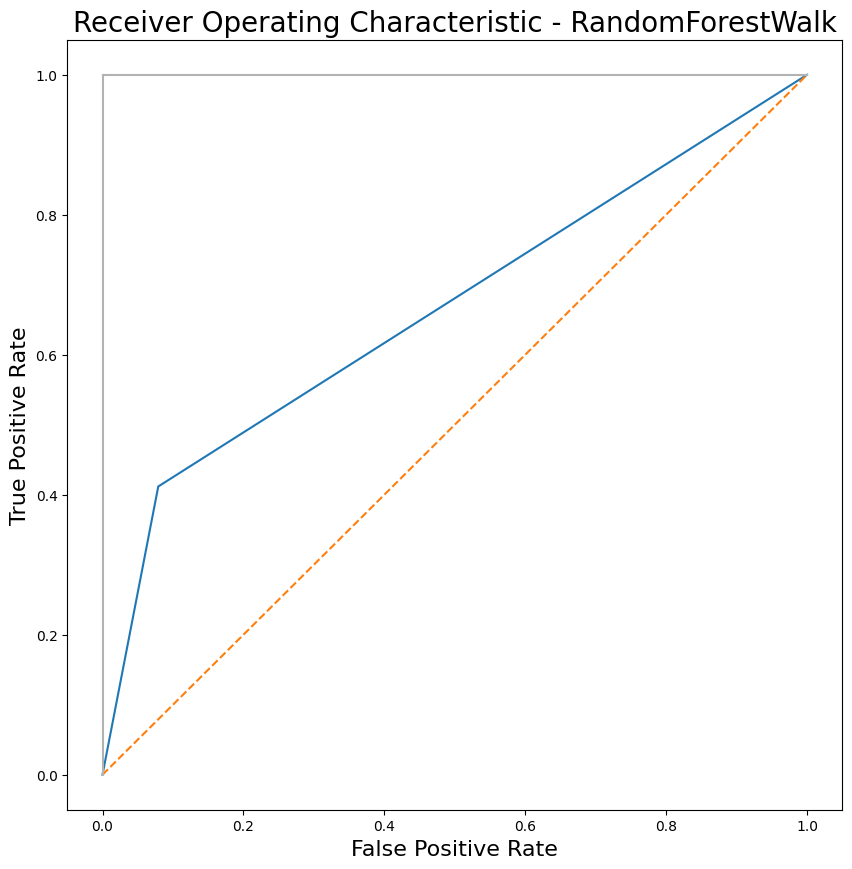

In [290]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RandomForestWalk', fontsize=20)
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.savefig('ROC_RFW.pdf', facecolor='white', transparent=True, dpi=500)
plt.show()


In [207]:
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(xy_test["target_x"], nb_pred2)


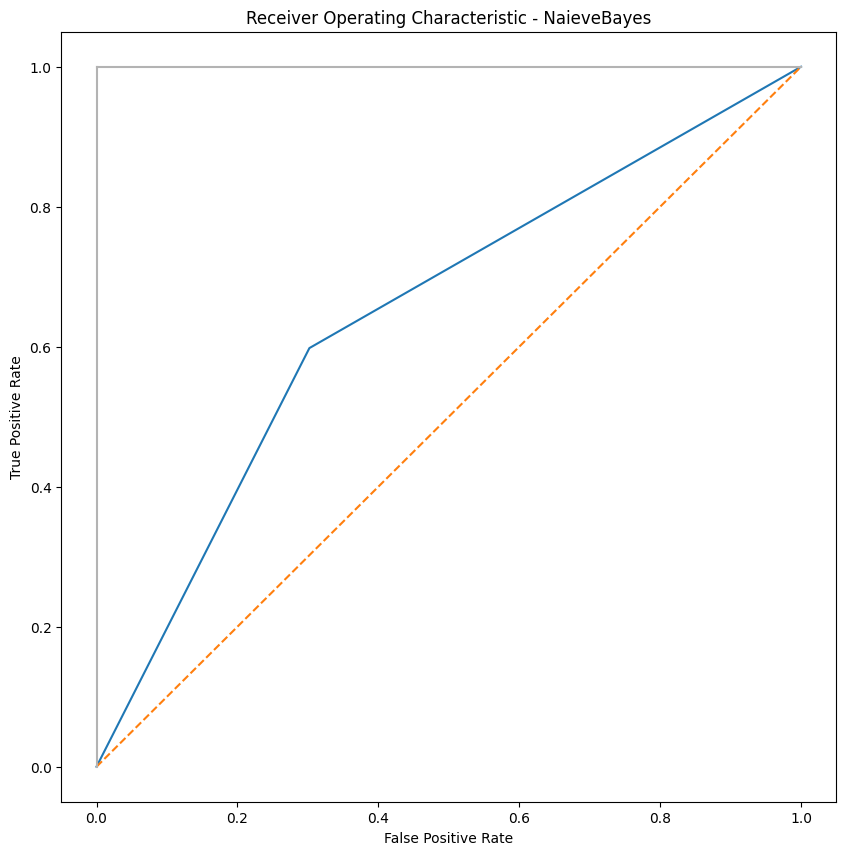

In [309]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - NaieveBayes')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [306]:
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(xy_test["target_x"], new_ann_pred)


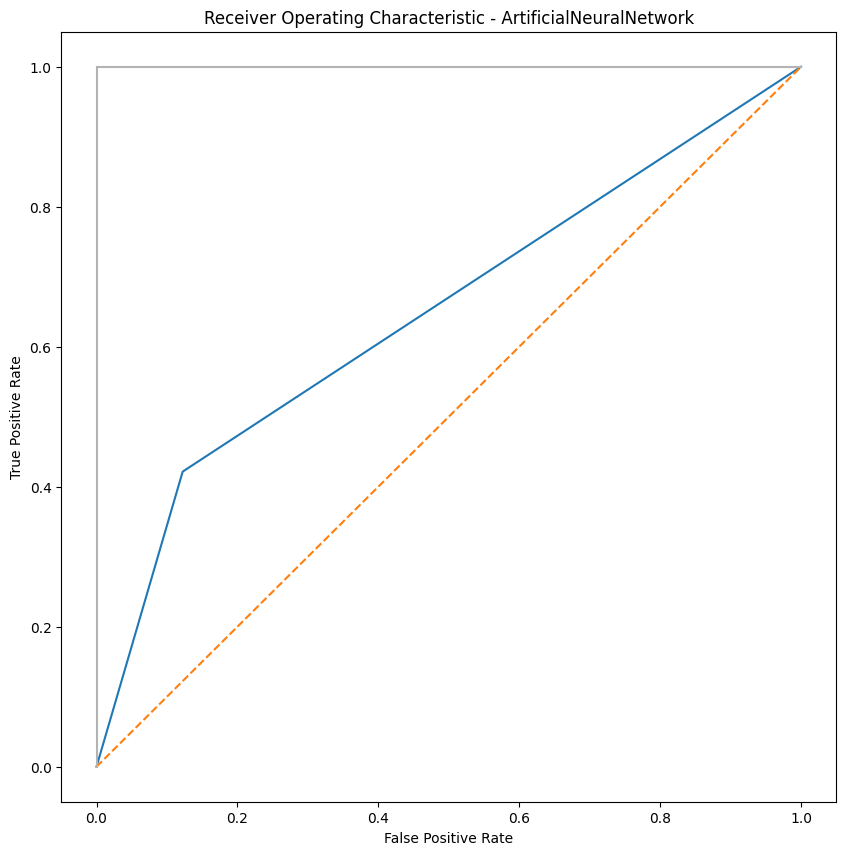

In [307]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - ArtificialNeuralNetwork')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [211]:
from sklearn import metrics

In [308]:
print('RandomForestWalk:', metrics.roc_auc_score(xy_test["target_x"], xy_preds))
print('NaieveBayes:', metrics.roc_auc_score(xy_test["target_x"], nb_pred2))
print('NeuralNetwork', metrics.roc_auc_score(xy_test["target_x"], new_ann_pred))

RandomForestWalk: 0.6663140076174354
NaieveBayes: 0.6479404711524899
NeuralNetwork 0.6496332345887995


## Comparison

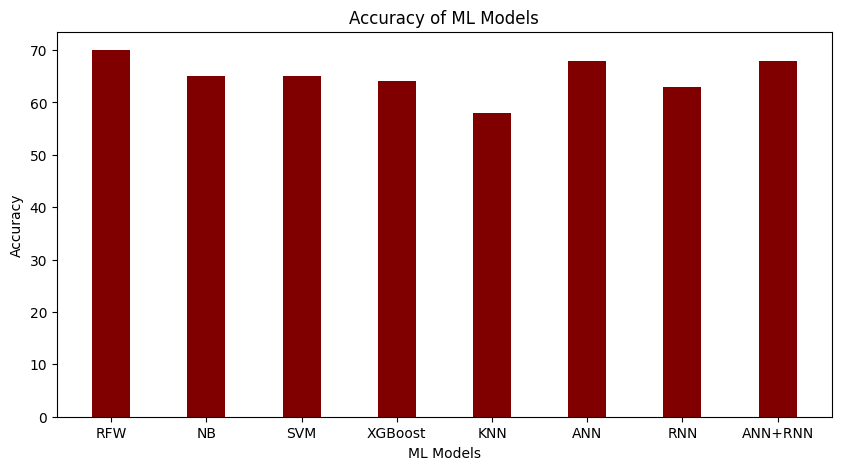

In [314]:
data1 = {'RFW':70, 'NB':65, 'SVM':65, 'XGBoost':64, 'KNN':58, 'ANN':68,'RNN':63, 'ANN+RNN':68}
models = list(data1.keys())
accuracies = list(data1.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, accuracies, color ='maroon', 
        width = 0.4)
 
plt.xlabel("ML Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of ML Models")
plt.savefig('AccuracyBar.pdf', facecolor='white', transparent=True, dpi=500)
plt.show()

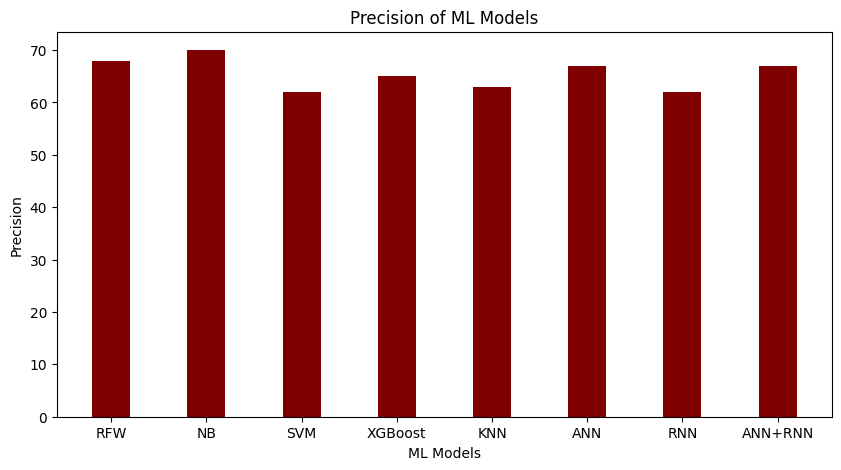

In [315]:
data2 = {'RFW':68, 'NB':70, 'SVM':62, 'XGBoost':65, 'KNN':63, 'ANN':67,'RNN':62, 'ANN+RNN':67}
models = list(data2.keys())
precisions = list(data2.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, precisions, color ='maroon', 
        width = 0.4)
 
plt.xlabel("ML Models")
plt.ylabel("Precision")
plt.title("Precision of ML Models")
plt.savefig('PrecisionBar.pdf', facecolor='white', transparent=True, dpi=500)
plt.show()

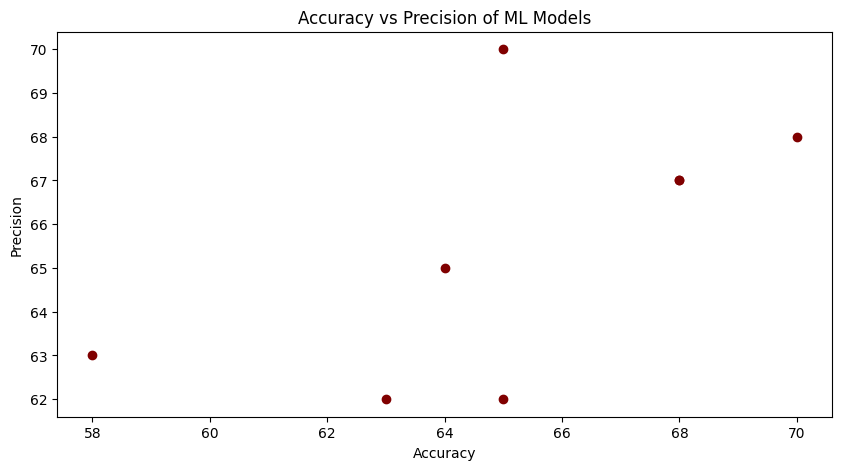

In [313]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.scatter(accuracies, precisions, color ='maroon')
 
plt.xlabel("Accuracy")
plt.ylabel("Precision")
plt.title("Accuracy vs Precision of ML Models")
plt.show()